In [1]:
import requests
import pandas as pd
import json
from datetime import datetime
from tqdm import tqdm
import os
import NFT_functions as NFTfunc

In [2]:
token_transfer_url  = "https://api.tzkt.io/v1/tokens/transfers"
token_transfer_count_url = "https://api.tzkt.io/v1/tokens/transfers/count"

LIMIT = 10000

nft_dir = "/mnt/Ivana/Data/Tezos/DataDuringProcessing/NFT/"
accounts_dir = nft_dir + "Accounts/"


In [3]:
nft_ids = {
    "Generative Springtime 02": [730111, "KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton"],
    "Garden, Monoliths #89" : [146074, "KT1KEa8z6vWXDJrVqtMrAeDVzsvxat3kHaCE"],
    "Window Still Life 001": [2371, "KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton"],
    "Window Still Life 101": [763422, "KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton"],
    "Tezzardz #514": [514, "KT1LHHLso8zQWQWg1HUukajdxxbkGfNoHjh6"],
    "Tezzardz #520" : [520, "KT1LHHLso8zQWQWg1HUukajdxxbkGfNoHjh6"],
    "Birth iii": [ 107012, "KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton"],
    "Generative Zlatna i" : [158552, "KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton"]
} 

artists = {
    "zancan.tez" : ["Generative Springtime 02", "Garden, Monoliths #89"],
    "jjjjjohn": ["Window Still Life 001", "Window Still Life 101"],
    "Tezzards": ["Tezzards #514", "Tezzards #520"],
    "Iskra Velitchkova": ["Birth iii", "Birth iii - Alive"]
}

## Get account details for the most popular accounts

In [4]:
# List of accounts for which we need to find all nfts
accounts = {
    "zancan.tez": "tz1gBXG9fg8RMDH69KfKqwoTH5sFDmzt5yzm",
    "jjjjjohn" : "tz1gqaKjfQBhUMCE6LhbkpuittRiWv5Z6w38",
    "Iskra Velitchkova" : "tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD",
    "Tezzardz": "tz1Nfr2qhuoGJSmK4oGv93QVfPgzTKChfcNK",
    "yazid.tez" : "tz1QgjmhrUD3X7kgS9mMHbUz4cS6uDiFGhAU"
}

In [5]:
for acc_name, acc_address in accounts.items():
    df_acc = NFTfunc.request_all_nfts_from_account(acc_address)
    df_acc["accountName"] = acc_name
    df_acc["accountAddress"] = acc_address

    df_acc.to_csv(accounts_dir + acc_name + ".csv", index=False)

## Get token transfer details for every token from user account list

In [6]:
df  =pd.read_csv("/mnt/Ivana/Data/Tezos/DataDuringProcessing/NFT/Accounts/Iskra Velitchkova.csv")
df

,name,contract_address,tokenId,supply,creators,transfersCount,accountName,accountAddress
0,Hic et nunc DAO,KT1AFA2mwNUMNd4SsujE1YYp29vd8BZejyKW,0,651099128108,NaN,88,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
1,Hic et Nunc - State of the Art - March 11th 2021,KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton,4202,50,['tz1hb9PiWxQEf6J9xevPsUM6dkuCLnhDMvsp'],1,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
2,Collection: Generative nature. Name: no name I,KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton,5324,1,['tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD'],2,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
3,Collection: Generative nature. Name: no name II,KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton,5603,1,['tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD'],2,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
4,Collection: Generative nature. Name: no name III,KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton,5952,1,['tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD'],2,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
...,...,...,...,...,...,...,...,...
1026,EDNŌ #88,KT1EfsNuqwLAWDd3o4pvfUx1CAh5GMdTrRvr,117239,1,NaN,1,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
1027,Sadok #53,KT1EfsNuqwLAWDd3o4pvfUx1CAh5GMdTrRvr,116972,1,NaN,1,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
1028,re:build #230,KT1U6EHmNxJTkvaWJ4ThczG4FSDaHC21ssvi,1558865,1,NaN,1,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD
1029,Somewhere In Between #115,KT1EfsNuqwLAWDd3o4pvfUx1CAh5GMdTrRvr,118097,1,NaN,1,Iskra Velitchkova,tz1gVKxpEGC7QW1fZyEEMEW2kgJRbpgWLNpD


In [12]:
def call_token_transfer_history_creation(x, tgt_dir):
    token_contract, token_id = x["contract_address"], x["tokenId"]
    file_name = tgt_dir + token_contract + "_" + str(token_id) + ".csv"
    if os.path.exists(file_name):
        return
    return NFTfunc.request_token_transfers(token_id=token_id, token_contract=token_contract, transfer_file=file_name)

In [23]:
temp_dir = nft_dir + "Temp/"
transfers_dir = nft_dir + "Transfers/"

for acc_file in tqdm(os.listdir(accounts_dir)):
    acc_name = acc_file[:-4]
    folder_name = temp_dir + acc_name + "/"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    df = pd.read_csv(accounts_dir + acc_file)
    df = df[(df.tokenId != 0) & (df.transfersCount > 1)]

    print(acc_name, " tokens with more than 1 transfer ", df.shape[0])

    all_responses = df.apply(lambda x: call_token_transfer_history_creation(x, folder_name), axis = 1)
    result = merge_all_csv_files_from_folder(folder_name)
    

    file_name_result = transfers_dir + acc_name + "_all_transfers.csv"
    result.to_csv(file_name_result, index=False)
    
# df.

  0%|          | 0/5 [00:00<?, ?it/s]

Tezzardz  tokens with more than 1 transfer  97


 20%|██        | 1/5 [00:00<00:01,  3.25it/s]

yazid.tez  tokens with more than 1 transfer  685


In [97]:
# details_list = []
# for name, values in nft_ids.items():
#     file_name = nft_dir + name + ".csv"

#     # if os.path.exists(file_name): continue
#     id, contract = values
#     token_details = request_token_transfers(id, contract, file_name)
#     details_list.append(token_details)

# token_details_df = pd.DataFrame.from_dict(details_list)
# token_details_df.to_csv(nft_dir + "Token_details.csv", index = False)

Nr of token transfers in Generative Springtime 02.csv: 455
Nr of token transfers in Garden, Monoliths #89.csv: 12
Nr of token transfers in Window Still Life 001.csv: 171
Nr of token transfers in Window Still Life 101.csv: 47
Nr of token transfers in Tezzards #514.csv: 5
Nr of token transfers in Tezzards #520.csv: 5
Nr of token transfers in Birth iii.csv: 5
Nr of token transfers in Generative Zlatna i.csv: 7


## Analysis

In [16]:
def merge_all_csv_files_from_folder_add_token_details(folder_path):
    all_dfs = []
    
    for file_name in os.listdir(folder_path):
        token_contract, tokenId = file_name.replace(".csv", "").split("_")
        df = pd.read_csv(folder_path + file_name)
        df["tokenId"] = tokenId
        df["contract_address"] = token_contract
        df["unique_token_id"] = file_name.replace(".csv", "")
        all_dfs.append(df)
    
    result = pd.concat(all_dfs, axis=0)
    return result

In [17]:
temp_dir = nft_dir + "Temp/"
transfers_dir = nft_dir + "Transfers/"
subdirectories = [f for f in os.listdir(temp_dir) if os.path.isdir(os.path.join(temp_dir, f))]

for folder in subdirectories:
    file_name = transfers_dir + folder + "_all_transfers.csv"
    df = merge_all_csv_files_from_folder_add_token_details(temp_dir + folder + "/")
    df.to_csv(file_name, index=False)
    

In [44]:
iskra = pd.read_csv(transfers_dir + "Iskra Velitchkova_all_transfers.csv")
iskra_org = pd.read_csv(nft_dir + "Accounts/Iskra Velitchkova.csv")

In [27]:
iskra_org[(iskra_org.transfersCount > 1) & (iskra_org.tokenId != "0")]
iskra_org["unique"] = iskra_org.apply(lambda x: x["contract_address"]+"_"+x["tokenId"], axis = 1)

In [36]:
accounts_dir  = nft_dir + "Accounts/"

for file in os.listdir(accounts_dir):
    df_acc = pd.read_csv(accounts_dir + file)
    df_acc = df_acc[(df_acc.tokenId != "0") & (df_acc.transfersCount > 1)]
    df_acc["uniqueId"] = df_acc.apply(lambda x: x["contract_address"]+"_"+str(x["tokenId"]), axis = 1)

    acc_folder = temp_dir + file.replace(".csv", "") + "/"
    done_tokens = [x.replace(".csv", "") for x in os.listdir(acc_folder)]
    org_size = df_acc.shape[0]
    done_size = df_acc[df_acc.uniqueId.isin(done_tokens)].shape[0]
    print(  f"{file.replace('.csv', '')}, number of tokens with more than 1 transfer: {org_size} done tokens: {done_size}" )

Tezzardz, number of tokens with more than 1 transfer: 102 done tokens: 102
yazid.tez, number of tokens with more than 1 transfer: 672 done tokens: 522
zancan.tez, number of tokens with more than 1 transfer: 351 done tokens: 342
jjjjjohn, number of tokens with more than 1 transfer: 181 done tokens: 72
Iskra Velitchkova, number of tokens with more than 1 transfer: 308 done tokens: 119


In [58]:
def convert_to_transfer_list(df_org):
    df = df_org.copy()
    df.price = pd.to_numeric(df.price) / 10**6
    df = df[df.price > 0]
    df = df[["timestamp", "price", "fromAddress", "toAddress", "unique_token_id"]]
    df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%dT%H:%M:%SZ")
    return df

In [59]:
iskra2 = convert_to_transfer_list(iskra)

In [60]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='Date'>

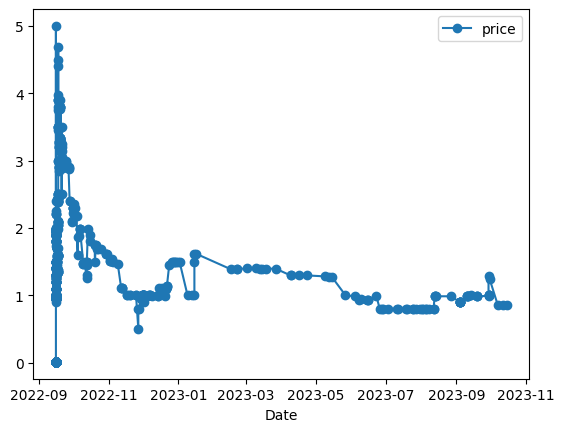

In [79]:
temp = iskra2[iskra2.unique_token_id == "KT1B1UVD2iLmZS3pbjNgDGAJQEmksZaMfL6v_7"]    
temp.plot(x="Date", y="price", marker = "o")     

In [72]:
iskra2["Date"] = iskra2.timestamp.apply(lambda x: x.date())
iskra2["Week"] = iskra2.Date.apply(lambda x: f"{x.year}-{x.isocalendar()[1]}")


In [74]:
average_price = iskra2.sort_values(by="Date", ascending=True).groupby("Week").price.mean()
transfer_count = iskra2.sort_values(by="Date", ascending=True).groupby("Week").price.count()

# average_price = iskra2.groupby("Date").price.mean()
# transfer_count = iskra2.groupby("Date").price.count()

<AxesSubplot: xlabel='Week'>

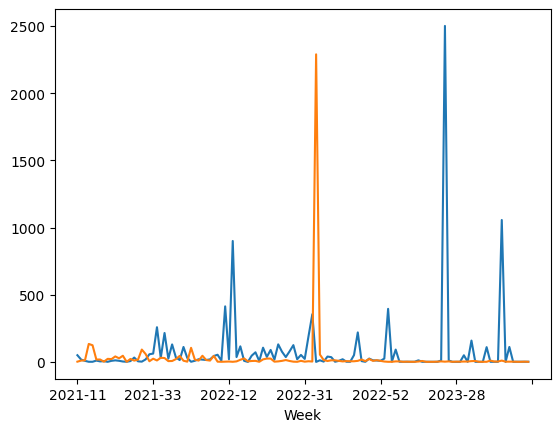

In [75]:
average_price.plot()
transfer_count.plot()

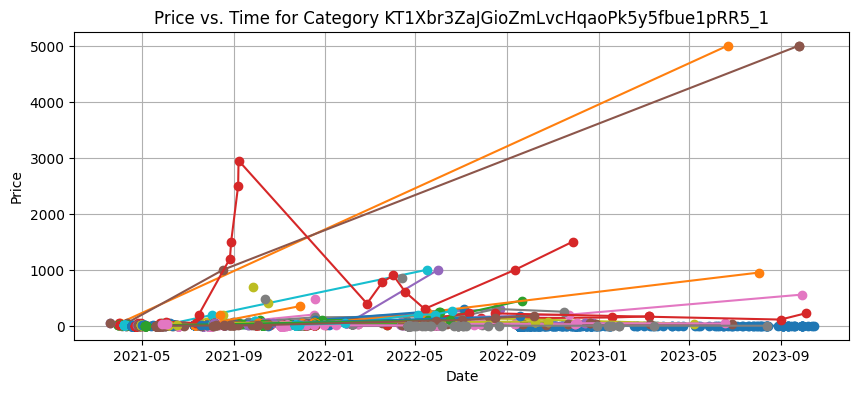

In [66]:
plt.figure(figsize=(10, 4))

for name, group in iskra2.groupby("unique_token_id"):
    plt.plot(group['timestamp'], group['price'], label=name, marker='o')
    plt.title(f'Price vs. Time for Category {name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)

plt.show()

In [51]:
iskra[iskra.price > 0].groupby("unique_token_id").id.count().sort_values(ascending=False)

unique_token_id
KT1B1UVD2iLmZS3pbjNgDGAJQEmksZaMfL6v_7         2524
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_37483      200
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_500462     148
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_186224     121
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_40935       96
                                               ... 
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_158552       1
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_340165       1
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_340144       1
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_340126       1
KT1RJ6PbjHpwc3M5rw5s2Nbmefwbuwbdxton_513895       1
Name: id, Length: 78, dtype: int64